### Prospect Mapping 2

#### After meeting
- Establishment Aplicor ID will be useful to group the same schools
- Option and completed are the good indiators from the stage
- Maybe take averages rather than adding deciles to then be able to remove characteristics without a value
- PP bracket is how much government help they get in percentage


In [1]:
# importing the necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import close as clc
# Importing the data from the .xlsx as a data frame using the pandas module
df = pd.read_csv("PGL_data.csv", low_memory = False)

#Removing the unecessary columns by name
df.drop(columns = {'Column21', 'Column22', 'Column23', 'Column24'}, inplace=True)
col = df.columns.tolist()

print('index  |                     column name     |    number of entries')
print('-------------------------------------------------------------------------------------')
for heading in col:
    print("%3.0f    |    %30s   |    %8.0f" % (col.index(heading), heading, len(df[heading].loc[df[heading].notna()])))
print('-------------------------------------------------------------------------------------')

index  |                     column name     |    number of entries
-------------------------------------------------------------------------------------
  0    |                      Account Name   |      187864
  1    |          Establishment Aplicor ID   |      187858
  2    |                Contact Aplicor ID   |      187864
  3    |                             Stage   |      187514
  4    |                Opportunity Source   |       87182
  5    |                       Loss Reason   |       51912
  6    |                           Product   |      183022
  7    |                            Course   |       59973
  8    |                 Booking Reference   |      187864
  9    |             Centre(s) of Interest   |       63827
 10    |                Accommodation Type   |       21327
 11    |                      Arrival Date   |      165044
 12    |                      Booking Date   |      139149
 13    |                         Age Range   |       59343
 14    |            

The schools need to be grouped, lets see how many there are.

In [2]:
print('Establishment Aplicor ID \t      | amount of entries')
print('----------------------------------------------------------')
df[col[1]].loc[df[col[1]].notna()].value_counts().head(5)

Establishment Aplicor ID 	      | amount of entries
----------------------------------------------------------


D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B    591
90019712-630C-46A5-97DA-3700973C36D4    139
5418D529-39E2-451F-8FC0-12ED43A769D0    114
750A0A98-2D53-451B-B4C0-D027AB49A048    106
818D43DF-714A-4259-B90D-FA57279CDE5E    103
Name: Establishment Aplicor ID, dtype: int64

***
So there are 20,608 schools on this record. By looking at the school that has 591 entries, the characteristics can be studied and see what they have in common with the other schools that have repeatedly used PGL.

In [3]:
df.loc[df[col[1]] == 'D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B'].head()

,Account Name,Establishment Aplicor ID,Contact Aplicor ID,Stage,Opportunity Source,Loss Reason,Product,Course,Booking Reference,Centre(s) of Interest,...,New_Existing,Booking Season,Time Lapse Band,Number of Children Band,PP Bracket,School Size by Pupils Banding,By Radias to Nearest Centre,Establishmet_Type,Decile_Value,Decile_F&M
1221,PGL Hen Party (IT TEST RECORD) - nicktest2,D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B,476E62B6-4BAE-4DEA-BE7D-6918F6D8A412,New,Brochure request,NaN,NaN,NaN,mm test,NaN,...,Existing,NaN,Do Not Apply,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2069,PGL Hen Party (IT TEST RECORD) - nicktest2,D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B,096de55f-840f-9dbd-cfab-652c03e85dc7,Closed - Not Quoted,Email,Reason not Listed,AUK (Adventure UK),NaN,AU21,NaN,...,Existing,NaN,Do Not Apply,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2090,PGL Hen Party (IT TEST RECORD) - nicktest2,D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B,096de55f-840f-9dbd-cfab-652c03e85dc7,Closed - Not Quoted,Phone Call,Reason not Listed,AUK (Adventure UK),NaN,AU22,NaN,...,Existing,NaN,Do Not Apply,NaN,NaN,NaN,NaN,NaN,2.0,2.0
5387,PGL Hen Party (IT TEST RECORD) - nicktest2,D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B,2DD6F70F-57E0-4473-ACA6-88F40C5E5854,New,NaN,NaN,NaN,NaN,Not in booking system,NaN,...,Existing,NaN,Do Not Apply,NaN,NaN,NaN,NaN,NaN,2.0,2.0
8820,PGL Hen Party (IT TEST RECORD) - nicktest2,D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B,538010DE-2D88-4248-B8B0-46A2DDF5B7A2,Closed - Not Quoted,Phone Call,Reason not Listed,LA (International),NaN,LA22,NaN,...,Existing,NaN,Do Not Apply,NaN,NaN,NaN,NaN,NaN,2.0,2.0


***
Looks like this Establishment Aplicor ID has been created for Hen parties or an 'IT TEST RECORD'. Changed it to just print the first record for less clutter. The next highest establishment is a school so I am gathering that the rest are real schools.

The line below takes all of the establishment aplicor ID's and turns them into a list stored in top_establishments

In [4]:
top_establishments_interaction = df[col[1]].loc[df[col[1]].notna()].value_counts().head(50)
top_establishments = df[col[1]].loc[df[col[1]].notna()].value_counts().head(500).index.tolist()
lower_establishments = df[col[1]].loc[df[col[1]].notna()].value_counts().tail(500).index.tolist()
# removing the hen party IT one
top_establishments.remove('D3CDEA22-A407-4D55-8BB6-2CDEFA39D20B')

Now using this, lets plot the total revenue against the number of children.

This isn't showing much. What I have done is taken the top 50 and lower 500 schools and plotted the bar charts for the amount of government funding that they recieve. I think that it's not showing much becasue the schools will have the same amount of funding regardless? So this is skewing the bars. If this is a characteristic that the school has throughout then. Maybe taking a column that changes for each school each time that they use PGL. Below is the bar chart for booking season.

Thinking about it, using this method is risky as the top 50 schools give a lot more data points than the bottom 200 and the same school is being plotted potentially 100 times for the top ones. I think each school has to be averaged out for each column in order to make the plotting fairer.

Below the goal will be to find either the aveages for columns that are unbounded values or the mode for those that are in bands. The best place to start is probabuly with the banding.

In [8]:
def mode_bar1(column,order):
    
    upper_schools = df.loc[df[col[1]].isin(top_establishments)]
    upper_mode= upper_schools.groupby([col[1]])[column].agg(pd.Series.mode)
    upper_mode = upper_mode[(upper_mode.str.len() > 0)]
    
    lower_schools = df.loc[df[col[1]].isin(lower_establishments)]
    lower_mode = lower_schools.groupby([col[1]])[column].agg(pd.Series.mode)
    lower_mode = lower_mode[lower_mode.str.len() > 0]
    
    upper_mode = pd.DataFrame(upper_mode); lower_mode = pd.DataFrame(lower_mode)

    plt.suptitle('Chart to show the mode of each school for ' + column)
    plt.subplot(1,2,1)
    upper_mode.value_counts().sort_index().plot(kind='bar',figsize = (10,3))
    plt.ylabel('Number of schools')
    plt.xlabel(column + ' for upper schools')

    plt.subplot(1,2,2)
    lower_mode.reindex(order)
    lower_mode.value_counts().plot(kind='bar', x = order, figsize = (10,5))
    plt.ylabel('Number of schools')
    plt.xlabel(column + ' for lower schools')

order = pd.DataFrame({'order': ['0-100', '101-250', '251-500', '501-1000', '1001-1500', '1501-2001']})
#order = ['0-100', '101-250', '251-500', '501-1000', '1001-1500', '1501-2001']

#mode_bar1(col[44], order)

In [9]:
#mode_bar1(col[43])
plt.close()

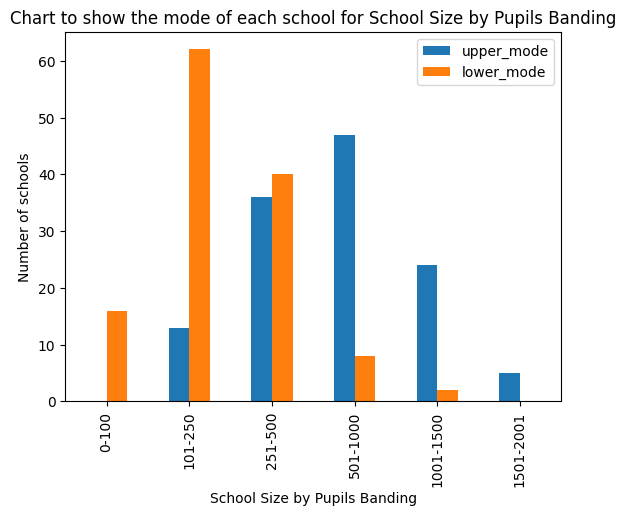

In [29]:
def mode_bar(column,order):
    upper_schools = df.loc[df[col[1]].isin(top_establishments)]
    upper_mode= upper_schools.groupby([col[1]])[column].agg(pd.Series.mode)
    upper_mode = upper_mode[(upper_mode.str.len() > 0)]
    
    lower_schools = df.loc[df[col[1]].isin(lower_establishments)]
    lower_mode = lower_schools.groupby([col[1]])[column].agg(pd.Series.mode)
    lower_mode = lower_mode[lower_mode.str.len() > 0]
    
    d = pd.DataFrame({'upper_mode' : upper_mode.value_counts(), 'lower_mode' : lower_mode.value_counts()})
    if order != 0:
        d.sort_index().loc[order].plot.bar()
    else:
        d.sort_index().plot.bar()
    plt.legend()
    plt.title('Chart to show the mode of each school for ' + column)
    plt.xlabel(column)
    plt.ylabel('Number of schools')

order = ['0-100','101-250','251-500','501-1000','1001-1500','1501-2001']
mode_bar(col[44],order)

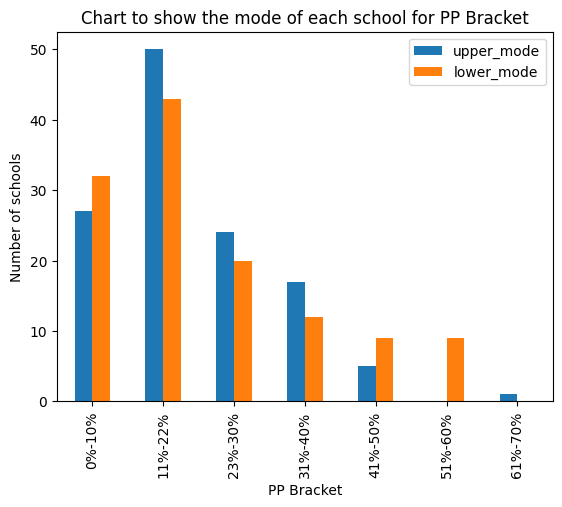

In [30]:
mode_bar(col[43], 0)

In [12]:

upper_schools = df.loc[df[col[1]].isin(top_establishments)]
upper_mode= upper_schools.groupby([col[1]])[col[33]].value_counts()
#upper_mode = upper_mode[(upper_mode.str.len() > 0)]

#lower_schools = df.loc[df[col[1]].isin(lower_establishments)]
#lower_mode = lower_schools.groupby([col[1]])[col[31]].mean()
#lower_mode = lower_mode[lower_mode.str.len() > 0]

#d = pd.DataFrame({'upper_mode' : upper_mode.value_counts(), 'lower_mode' : lower_mode.value_counts()})
#d.sort_index().plot.bar()
#plt.legend()
#plt.title('Chart to show the mode of each school for ' + column)
#plt.xlabel(column)
#plt.ylabel('Number of schools')